# Analiza Sentiment leksikona -ADA + NB



In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a2.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,ID,POS,NEG,Lemme,Definicija,Vrsta,OBJ
0,ENG30-03574555-n,0.0,0.0,ustanova,zgrada u kojoj se nalazi organizaciona jedinic...,n,1.0
1,ENG30-07810907-n,0.0,0.0,začin,pripremljeni dodatak jelu za poboljšanje ukusa,n,1.0
2,ENG30-00721431-n,0.0,0.0,mesto,"u nečijim prilikama, mogućnostima",n,1.0
3,ENG30-00473799-v,0.0,0.0,"obnoviti,doterati,uglancati,uljuditi",Ostalo je još samo da se doteraju neke finese ...,v,1.0
4,ENG30-00903385-v,0.0,0.0,oprostiti,Zapad mu je oprostio što se nekada računao u S...,v,1.0
...,...,...,...,...,...,...,...
25315,ENG30-15266265-n,0.0,0.0,mandat,mandat predsednika,n,1.0
25316,ENG30-15266685-n,0.0,0.0,sredina,vreme između početka i kraja vremenskog perioda,n,1.0
25317,ENG30-15266911-n,0.0,0.0,"gotovo,konac,kraj,prestanak,svršetak,završetak",tačka u vremenu kada se nešto završava,n,1.0
25318,ENG30-15276642-n,0.0,0.0,"b/s,bitova u sekundi",(računarstvo) brzina prenosa podataka (npr. ko...,n,1.0


In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
pd.set_option('display.max_rows', None)

## Statistike

Raspored reči prema pozitivnom polaritetu 

In [8]:
sent_an["POS"].value_counts()

POS
0.000    23656
0.125      864
0.250      324
0.375      197
0.500      137
0.750       58
0.625       44
1.000       23
0.875       17
Name: count, dtype: int64

In [9]:
sent_an[sent_an["POS"]>.9]

,ID,POS,NEG,Lemme,Definicija,Vrsta,OBJ
701,ENG30-06206800-n,1.0,0.0,"poštovanje,respekt",Stav divljenja ili poštovanja.,n,0.0
1355,ENG30-02164694-v,1.0,0.0,diviti se,Gledati nekoga sa divljenjem.,v,0.0
2714,ENG30-07499615-n,1.0,0.0,"prijaznost,druželjubivost",Osećanje naklonjenosti drugim osobama; uživanje u njihovom društvu,n,0.0
2778,ENG30-04616916-n,1.0,0.0,karakter,Inherentni kompleks atributa koji određuju moralne i etičke akcije i reakcije osoba.,n,0.0
5238,ENG30-05168261-n,1.0,0.0,važnost,Kvalitet nekoga ili nectega što je važno ili vredno pažnje.,n,0.0
5352,ENG30-04814238-n,1.0,0.0,"veličanstvenost,briljantnost","Osobina nekoga ko je veličanstven, briljantan",n,0.0
5389,ENG30-00217728-a,1.0,0.0,lep,"Koji ushićuje čula, uzbuđuje duh ili izaziva emocionalno divljenje.",a,0.0
7975,ENG30-01133876-a,1.0,0.0,dobrodušan,"Koji ima veseo karkater, nije sklon brigama.",a,0.0
12070,ENG30-01372049-a,1.0,0.0,ljubazan,"Onaj ko ima nežnu, pažljivu i obzirnu prirodu; koristi se za osobe i njihovo ponašanje.",a,0.0
12961,ENG30-01130733-a,1.0,0.0,iskupljući,koji donosi spasenje ili iskupljenje od greha,a,0.0


Raspored reči prema negativnom polaritetu 

In [10]:
sent_an["NEG"].value_counts()

NEG
0.000    23354
0.125      916
0.250      413
0.375      198
0.500      178
0.625       76
0.750       71
1.000       65
0.875       49
Name: count, dtype: int64

In [11]:
sent_an[sent_an["NEG"]>.9]

,ID,POS,NEG,Lemme,Definicija,Vrsta,OBJ
37,ENG30-01797051-v,0.0,1.0,"oplakati,tugovati,jadikovati,ožaliti",Osećati tugu.,v,0.0
141,ENG30-07305234-n,0.0,1.0,"nedaća,beda",Uzrok velikih patnji i nesreće.,n,0.0
540,ENG30-07298982-n,0.0,1.0,"udarac,udar,šok",neprijatno ili razočaravajuće iznenađenje,n,0.0
541,ENG30-05942888-n,0.0,1.0,"ubeđenje,uverenje",nepokolebljivo verovanje u nešto bez potrebe za dokazima ili nalazima,n,0.0
903,ENG30-01797347-v,0.0,1.0,"tugovati,žalovati",biti jako tužan,v,0.0
2041,ENG30-00203866-v,0.0,1.0,pogoršati se,Postati lošije.,v,0.0
2496,ENG30-13989051-n,0.0,1.0,"jad,tugovanje",Stanje u kome je neko tužan.,n,0.0
2505,ENG30-01752167-a,0.0,1.0,nesavršen,Koji nije savršen; defektan ili neadekvatan.,a,0.0
2695,ENG30-00070965-n,0.0,1.0,"greška,pogreška","Pogrešna akcija koja se može pripisati lošoj proceni, neznanju ili nepažnji.",n,0.0
2726,ENG30-01142899-a,0.0,1.0,nesrećan,"Onaj koji proživljava tugu, žalost ili nezadovoljtvo ili označen njima ili ih izaziva.",a,0.0


Raspored reči prema objektivnosti 

In [12]:
sent_an["OBJ"].value_counts()

OBJ
1.000    22107
0.875     1221
0.750      731
0.625      489
0.500      334
0.250      136
0.375      134
0.000       91
0.125       77
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

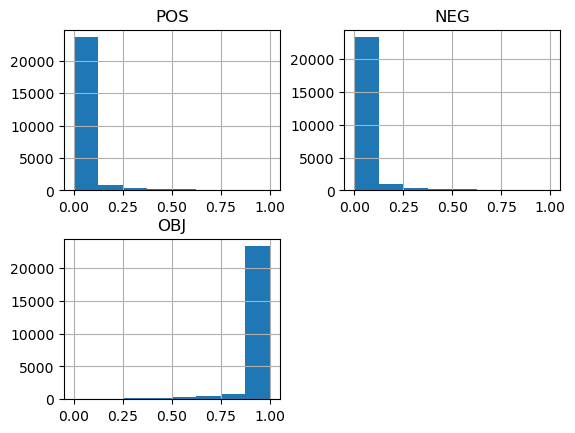

In [14]:
sent_an.hist(bins=8)

<Axes: >

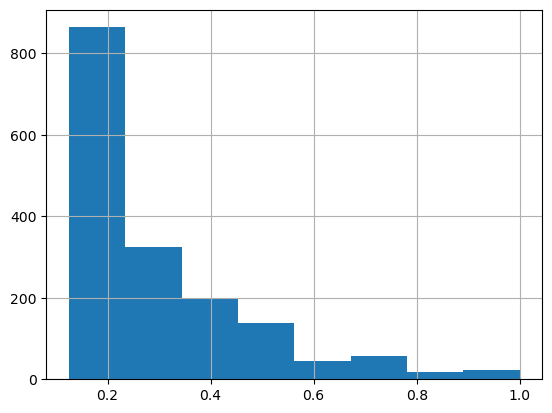

In [15]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

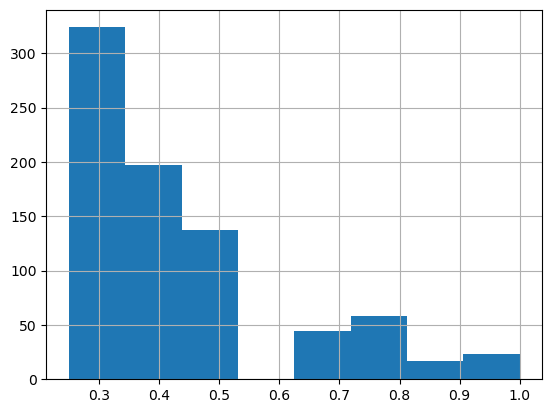

In [16]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

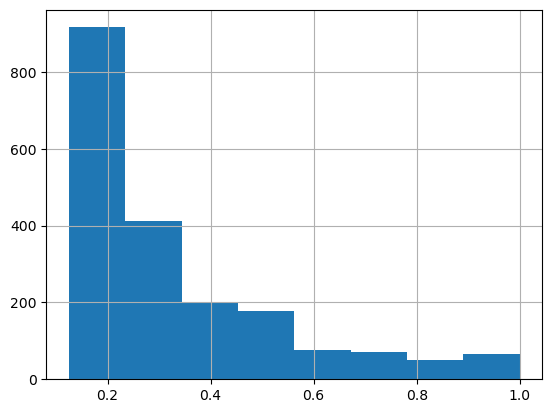

In [17]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

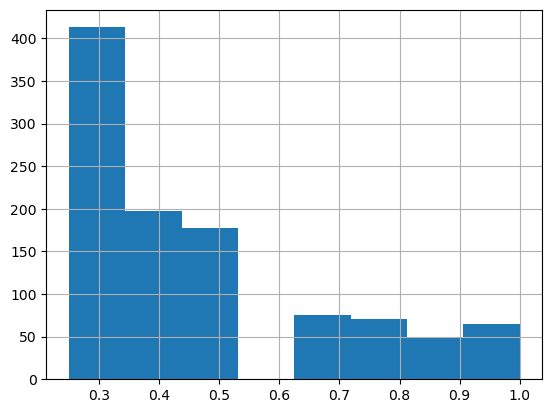

In [18]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [19]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

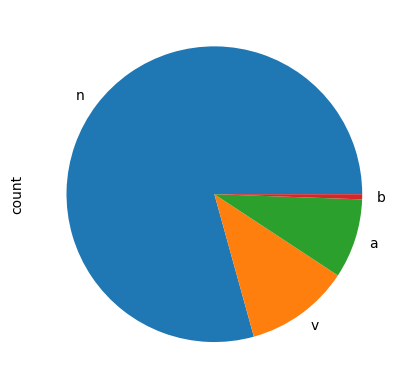

In [20]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

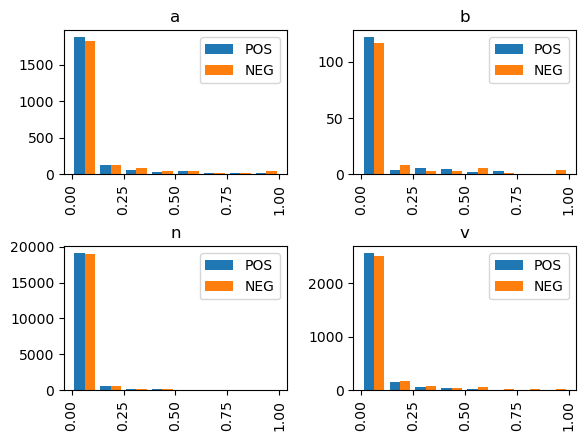

In [21]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

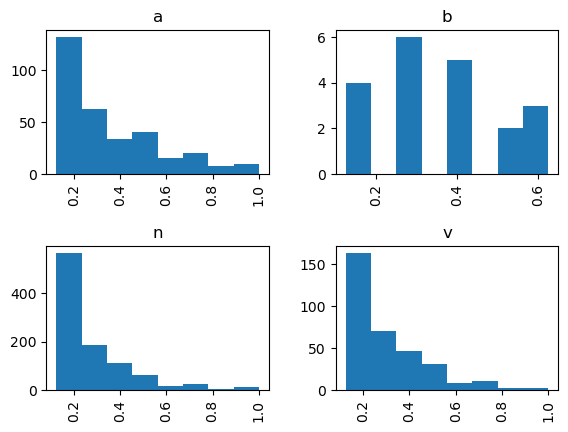

In [22]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

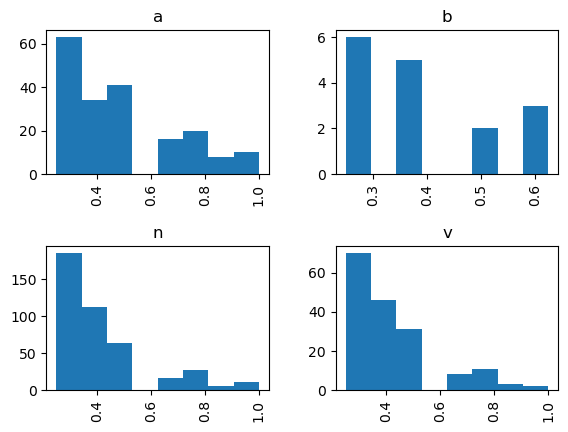

In [23]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

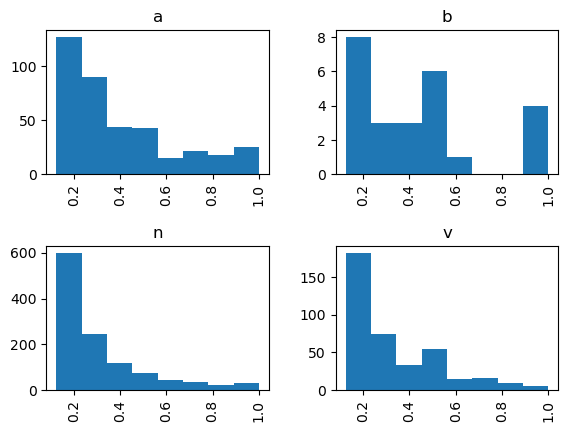

In [24]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

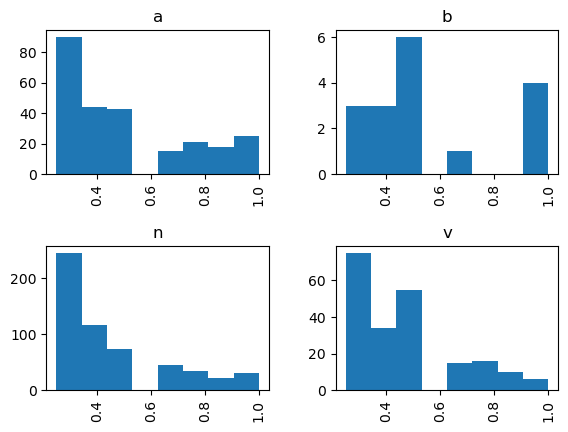

In [25]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

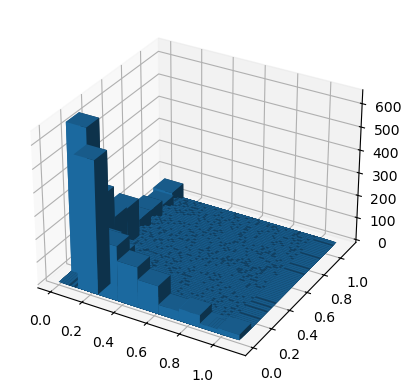

In [26]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

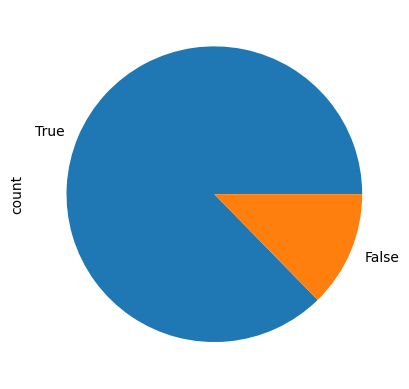

In [27]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

<Axes: xlabel='NEG'>

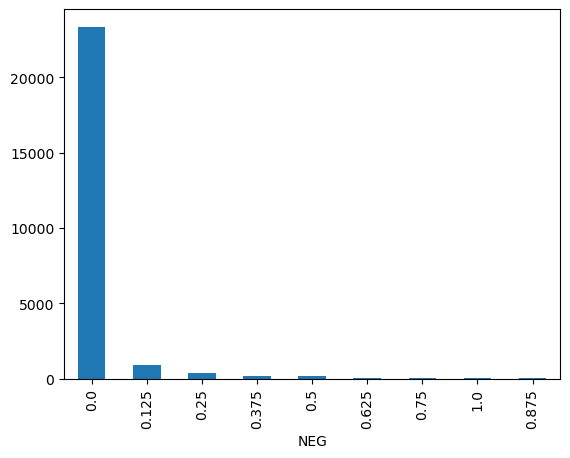

In [28]:
sent_an["NEG"].value_counts().plot(kind = "bar")

<Axes: xlabel='POS'>

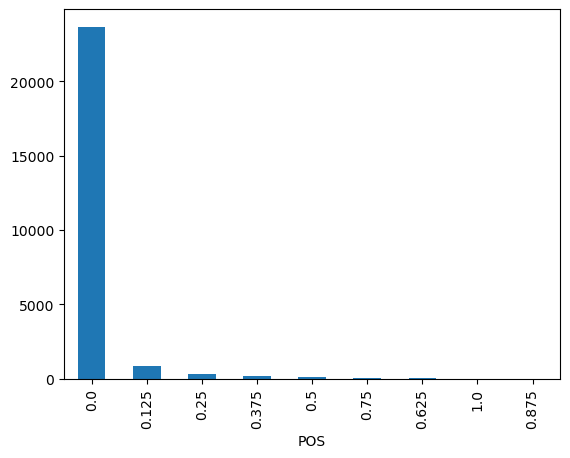

In [29]:
sent_an["POS"].value_counts().plot(kind = "bar")

In [30]:
a = sent_an[["POS","NEG"]].value_counts(sort=True)

<Axes: ylabel='count'>

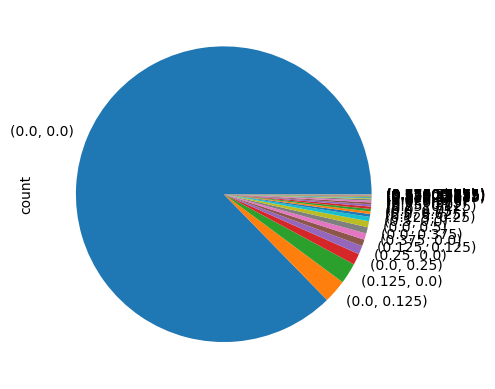

In [31]:
a.plot(kind ="pie")

In [32]:
sent_an["Vrsta"].value_counts()

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: title={'center': 'imenice-negativno'}, xlabel='NEG'>

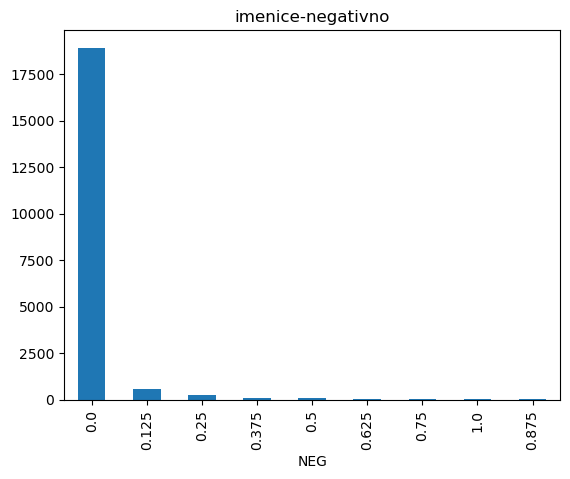

In [33]:
sent_an[sent_an["Vrsta"] == 'n']["NEG"].value_counts().plot(kind = "bar", title = "imenice-negativno")

<Axes: title={'center': 'imenica-positivno'}, xlabel='POS'>

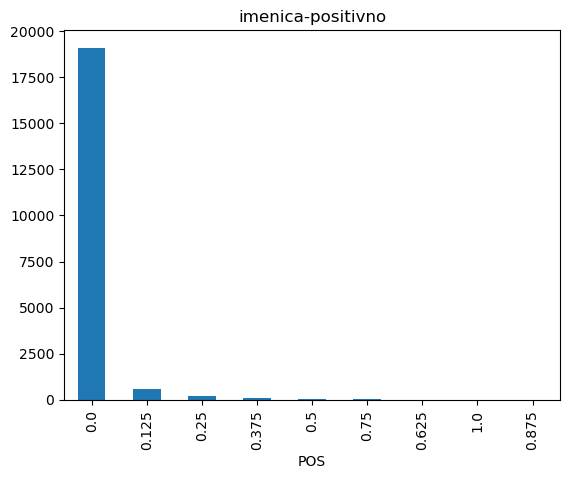

In [34]:
sent_an[sent_an["Vrsta"] == 'n']["POS"].value_counts().plot(kind = "bar", title = "imenica-positivno")

<Axes: title={'center': 'glagol-negativno'}, xlabel='NEG'>

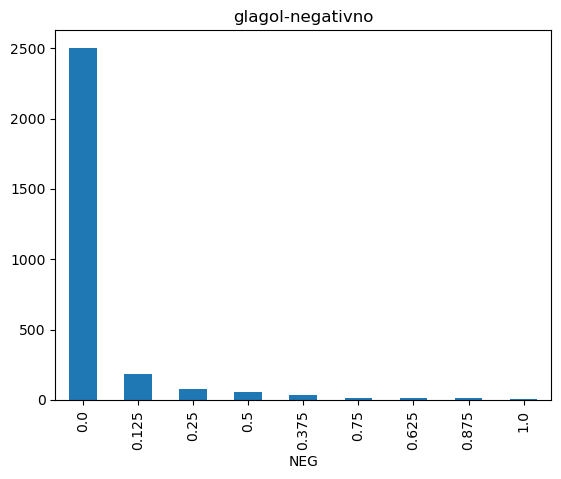

In [35]:
sent_an[sent_an["Vrsta"] == 'v']["NEG"].value_counts().plot(kind = "bar", title = "glagol-negativno")

<Axes: title={'center': 'glagol-positivno'}, xlabel='POS'>

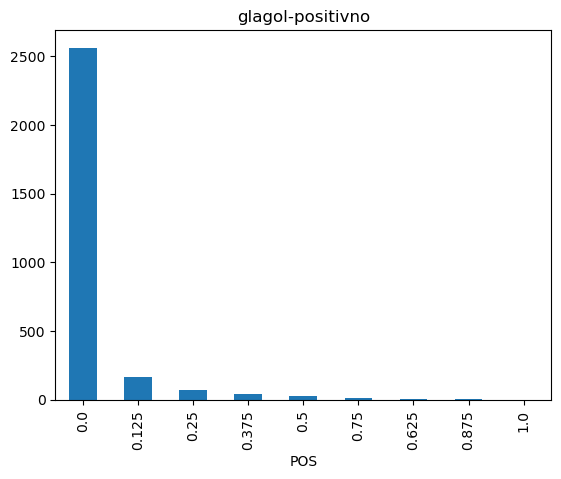

In [36]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "glagol-positivno")

<Axes: title={'center': 'pridev-negativno'}, xlabel='NEG'>

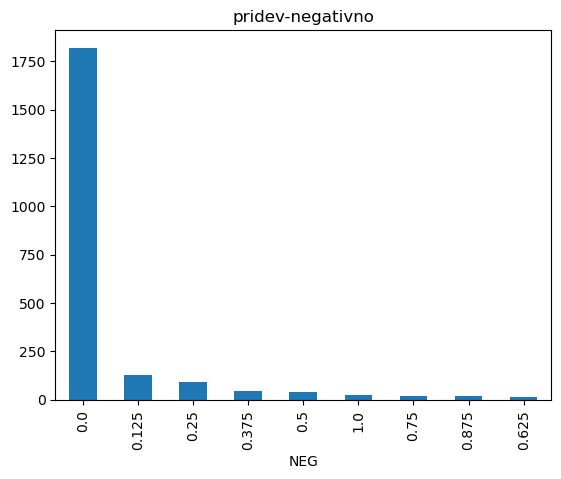

In [37]:
sent_an[sent_an["Vrsta"] == 'a']["NEG"].value_counts().plot(kind = "bar", title = "pridev-negativno")

<Axes: title={'center': 'pridev-positivno'}, xlabel='POS'>

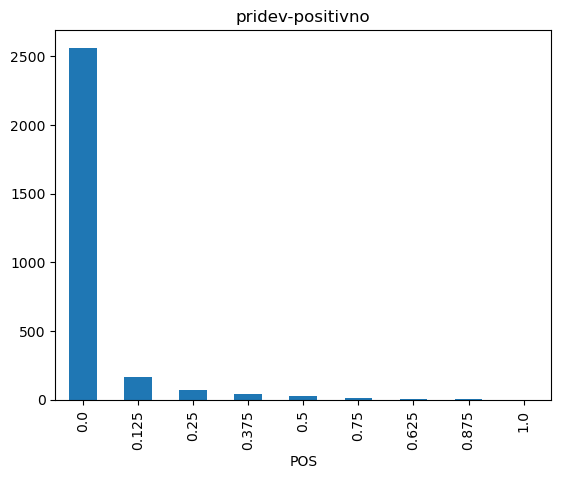

In [38]:
sent_an[sent_an["Vrsta"] == 'v']["POS"].value_counts().plot(kind = "bar", title = "pridev-positivno")

KeyError: 0

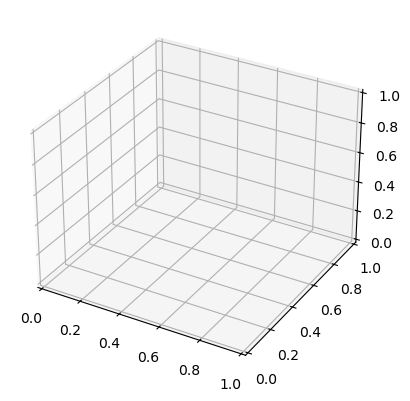

In [39]:

fig = plt.figure()
b =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')


In [ ]:
a = sent_an[["POS","NEG", "Vrsta"]].value_counts(sort=True)
a

In [ ]:
fig = plt.figure()
c =pd.DataFrame(a).reset_index()
ax = plt.axes(projection ='3d')

b =c [c["Vrsta"]=="n"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='green')
b =c [c["Vrsta"]=="v"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='blue')
b =c [c["Vrsta"]=="a"] 
ax.scatter(b["POS"],b["NEG"],b[0], color ='red')



In [ ]:
# srbsentiwordnet2.csv
# srbsentiwordnet_a2.csv